<a href="https://colab.research.google.com/github/buttaakhil/Position_Salary_Prediction/blob/main/PolynomailRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("Position_Salaries.csv")
print(dataset.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


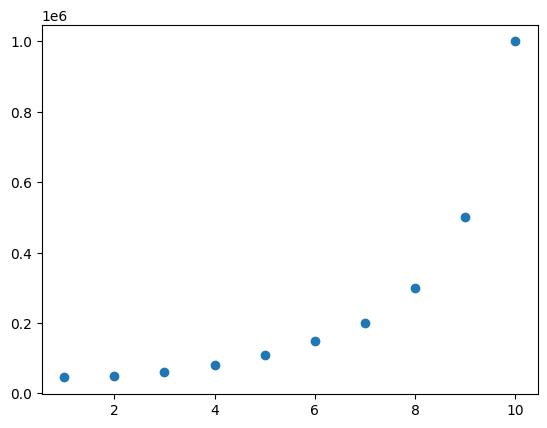

In [139]:
plt.scatter(dataset["Level"], dataset["Salary"], label="Actual Data")
plt.show()

In [140]:
dataset.drop(columns=["Position"], inplace=True)
x = dataset[["Level"]]
y = dataset["Salary"]

In [141]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x=pf.transform(x)      #transforming singe input data into multiple data of increasing power
print(x)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [143]:
lr = LinearRegression()
lr.fit(x_train, y_train)

print(lr.score(x_test, y_test))

0.7666492889299961


In [144]:
print(lr.coef_)
print(lr.intercept_)

[      0.         -137634.60994912   20502.04918033]
231288.5104578872


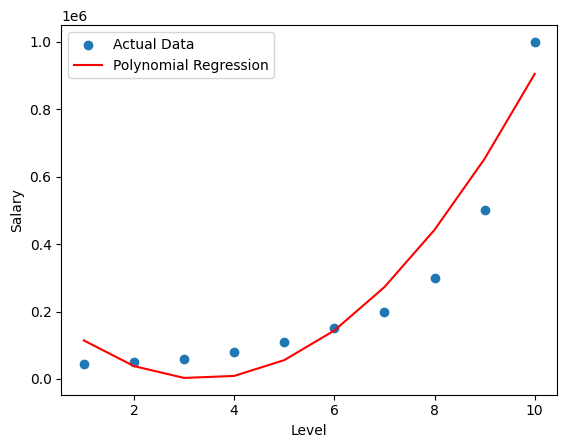

In [145]:

plt.scatter(dataset["Level"], dataset["Salary"], label="Actual Data")
plt.plot(dataset["Level"], lr.predict(x), color="red", label="Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [146]:
test=lr.predict(pf.transform([[6.5]]))
print(test[0])

202875.12365743343


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
